<a href="https://colab.research.google.com/github/Jobby-John/KNN-AND-NAIVE-BAYES/blob/main/Week_9_Ip_on_k_Nearest_Neighbours(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Week 9 Ip on k-Nearest Neighbours(KNN)*

**Defining the question**

a) Specifying the analytic question

Build a model using K-N Neighbours to predict the survivors of the titanic shipwreck.

Adjust splitting size for training test and number of neigbours in order to optimize the model


**b) Defining the Metric of Success**

If the model has an accuracy higher than 80% it will be considered successful

**c)Understanding the context**

The RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew on board, more than 1,500 lost their lives in the disaster.

Building a model that can predict survivers is crucial in order to prevent future tragedies.


**d)Recording the Experimental Design**

importing libraries

-loading data

-data cleaning

-exploratory data analysis

-modeling

-implementing model

-conclusion

-recommendations


**2.Reading the Data**

In [143]:
#importing the libaries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [144]:
#Loading the data
data=pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**3. Checking the Data**

In [145]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [146]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
#previewing the bottom of our data
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [148]:
#check the datatypes of the variables
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**5. Tidying the Dataset**

In [149]:
#The first step we will do is to drop the columns that we do not need 
#These columns include 'PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'
data=data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'],axis=1)

In [150]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [151]:
#Before we go ahead and clean the data we need to first encode the columns embarked and sex
data['Embarked']=data['Embarked'].astype('category')
data['Sex']=data['Sex'].astype('category')

In [152]:
#Let us preview our dataset
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [153]:
#Checking the existence of null values 
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [154]:
#Let us find the mean ages of the people and replace it with the null values in the age column
data_mean=data['Age'].mean()
data_mean

29.69911764705882

In [155]:
data['Age'].fillna(29,inplace=True)

In [156]:
#Checking for duplicates in the dataset
data.duplicated().sum()
#There are 306 duplicates in our dataset

315

In [157]:
# dropping duplicate values
data.drop_duplicates(keep=False,inplace=True)

In [158]:
#Let us check for any duplicates after dropping them
data.duplicated().sum()
#We have no duplicates now

0

In [159]:
#Let us check for unique values in our dataset
data.nunique().sum
#Our data seems to have many unique values

<bound method Series.sum of Survived     2
Pclass       3
Sex          2
Age         86
SibSp        6
Parch        7
Embarked     3
dtype: int64>

In [160]:
#checcking the numerical and categorical variables
numerical = data._get_numeric_data().columns
categorical = set(data.columns) - set(numerical)

In [161]:
numerical

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch'], dtype='object')

In [162]:
categorical

{'Embarked', 'Sex'}

In [163]:
#Let us encode the dataset
data['Embarked']=data['Embarked'].cat.codes
data['Sex']=data['Sex'].cat.codes

In [164]:
data.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
6,0,1,1,54.0,0,0,2
7,0,3,1,2.0,3,1,2


UNIVARIATE AND BIVARIATE ANALYSIS

In [165]:
data['Survived'].value_counts()

0    240
1    232
Name: Survived, dtype: int64

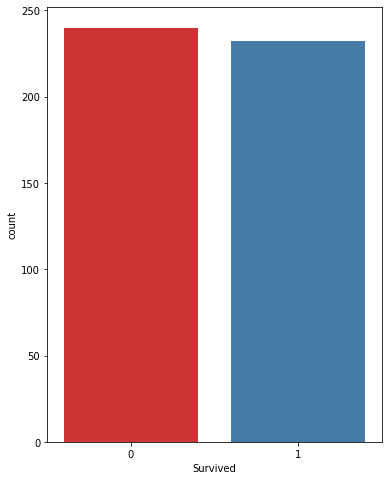

In [166]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="Survived", data=data, palette="Set1")
plt.show()

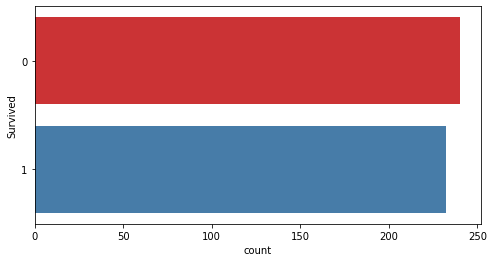

In [167]:
#PLOTTING HORIZONTALLY
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="Survived", data=data, palette="Set1")
plt.show()

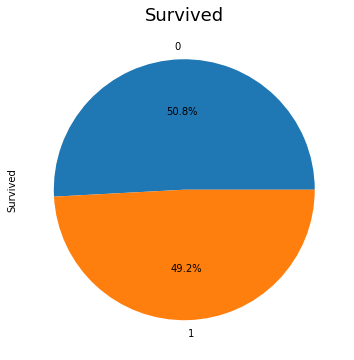

In [168]:
#Pie chart on survival rates
#

data['Survived'].value_counts().head(5).plot.pie(figsize=(8,6),autopct='%1.1f%%')

plt.title('Survived',size=18)
plt.show()

The number of unique values in Survived variable is 2.

The two unique values are No and Yes.

The No variable have 243 entries, and

The Yes variable have 241 entries.


Checking for outliers

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch'], dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

IndexError: ignored

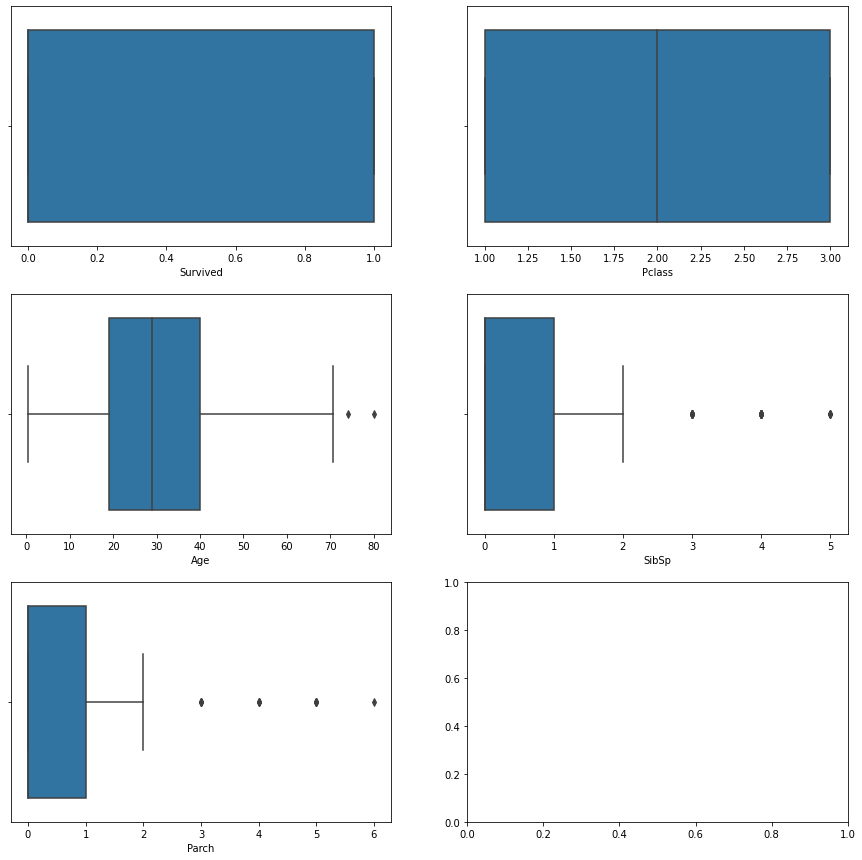

In [169]:
num_of_rows = 3
num_of_cols = 2
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(numerical)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(data[numerical[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.savefig('before_removing_outliers_from_numerical_columns.png')
plt.show()

In [170]:
lsUpper = []
lsLower = []
def removeOutliers(numerical):
    for i in range(len(numerical)):
        q1 = data[numerical[i]].quantile(0.25)
        q3 = data[numerical[i]].quantile(0.75)
        IQR = q3-q1
        minimum = q1 - 1.5 * IQR
        maximum = q3 + 1.5 * IQR
        data.loc[(data[numerical[i]] <= minimum), numerical[i]] = minimum
        data.loc[(data[numerical[i]] >= maximum), numerical[i]] = maximum  
removeOutliers(numerical)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch'], dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

IndexError: ignored

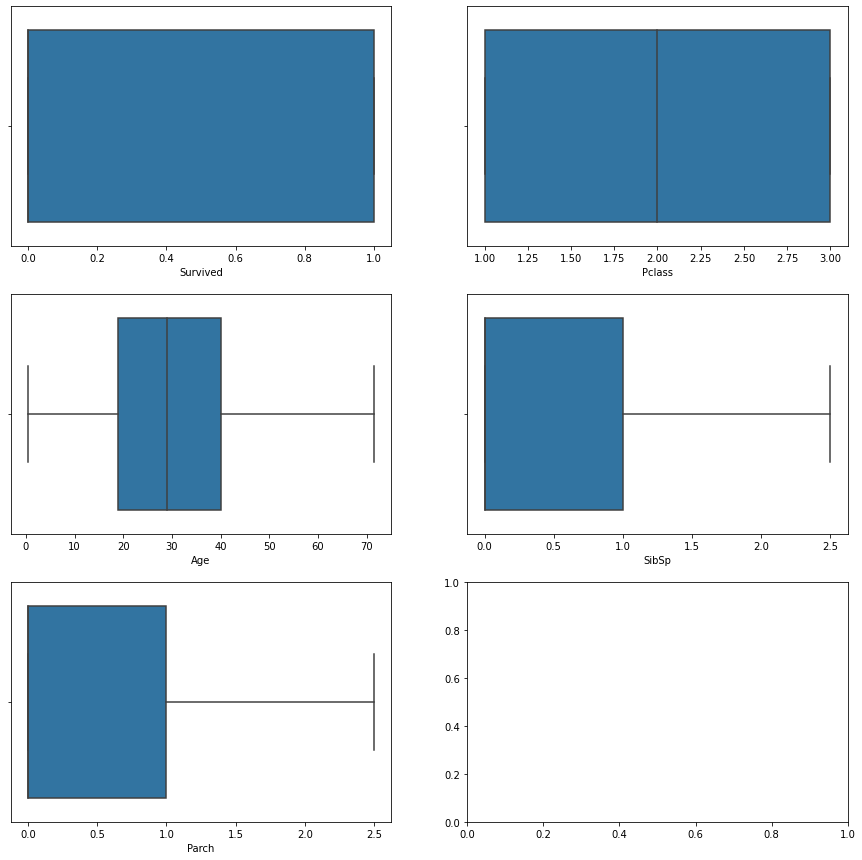

In [171]:
num_of_rows = 3
num_of_cols = 2
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(numerical)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(data[numerical[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.savefig('after_removing_outliers_from_numerical_columns.png')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4a83f0090>,
      dtype=object)

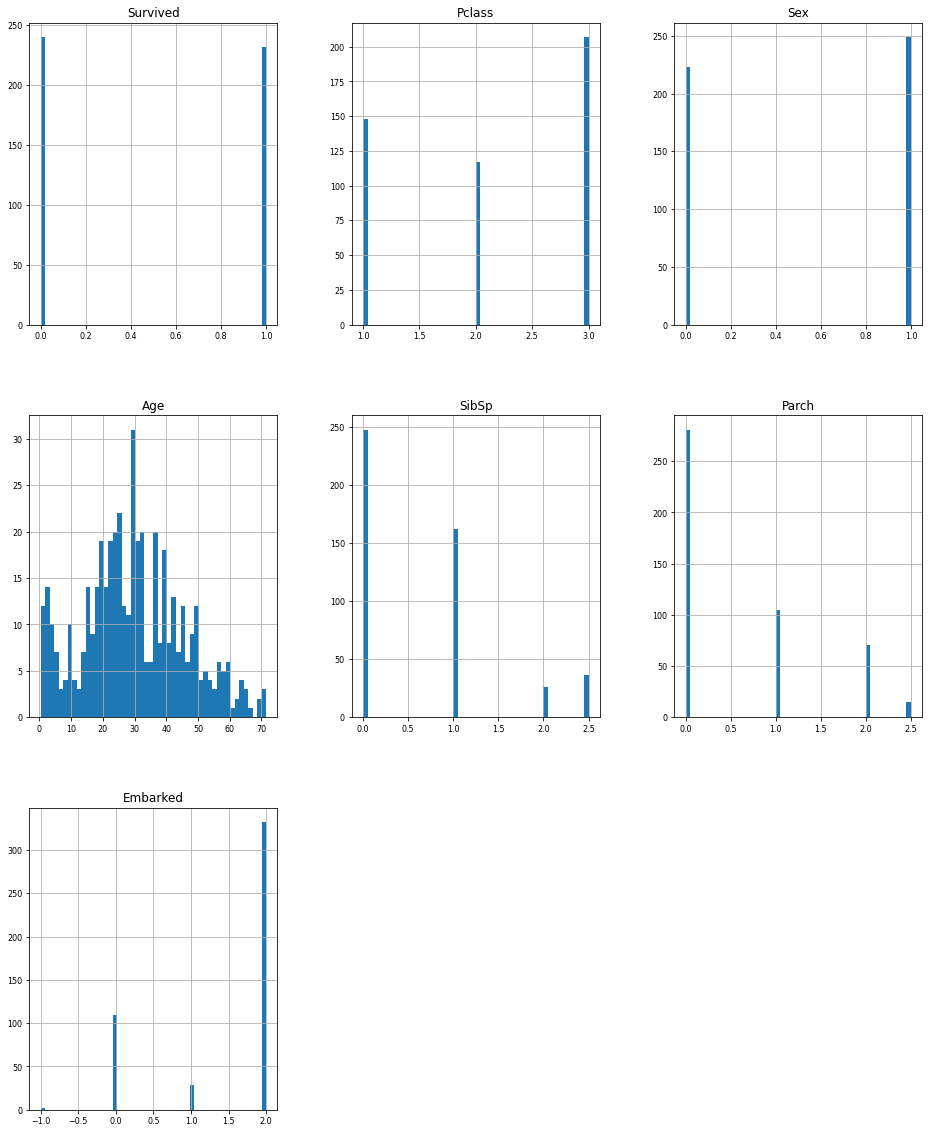

In [172]:
#Let us create the histograms
data.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'People that did not Survive')

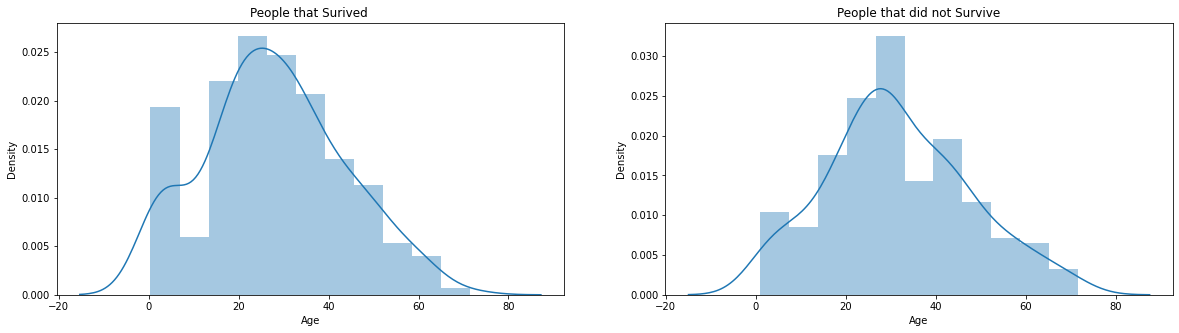

In [173]:
#Checking the missing the people that survived based on their age 
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.distplot(data[data['Survived']==1].Age,ax=ax[0])
ax[0].set_title('People that Surived ')
sns.distplot(data[data['Survived']==0].Age,ax=ax[1])
ax[1].set_title('People that did not Survive')

Most of the children survived compared to the elder people
Majority of the people that died 20 and 40

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'People that did not Survive based on gender')

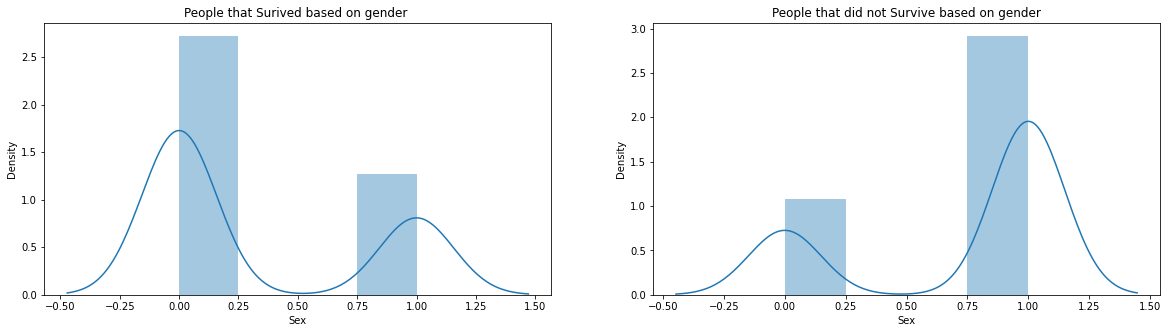

In [174]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.distplot(data[data['Survived']==1].Sex,ax=ax[0])
ax[0].set_title('People that Surived based on gender ')
sns.distplot(data[data['Survived']==0].Sex,ax=ax[1])
ax[1].set_title('People that did not Survive based on gender')

In [175]:
#Between males and females who survived 
data.groupby(["Survived","Sex"])["Sex"].count()

#More males lost their lives

Survived  Sex
0.0       0       65
          1      175
1.0       0      158
          1       74
Name: Sex, dtype: int64

          Survived    Pclass       Sex       Age     SibSp     Parch  Embarked
Survived  1.000000 -0.301228 -0.410766 -0.113582 -0.149635  0.016496 -0.057520
Pclass   -0.301228  1.000000  0.019162 -0.354915  0.182616  0.106211  0.160069
Sex      -0.410766  0.019162  1.000000  0.127202  0.011414 -0.178126 -0.012524
Age      -0.113582 -0.354915  0.127202  1.000000 -0.334581 -0.304381 -0.020811
SibSp    -0.149635  0.182616  0.011414 -0.334581  1.000000  0.320863  0.162222
Parch     0.016496  0.106211 -0.178126 -0.304381  0.320863  1.000000  0.124674
Embarked -0.057520  0.160069 -0.012524 -0.020811  0.162222  0.124674  1.000000


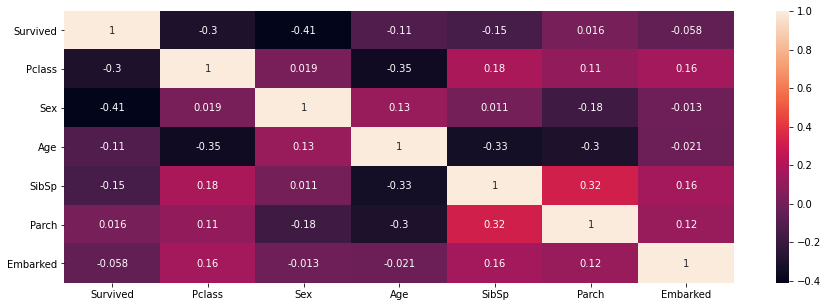

In [177]:
#Correlation 
print(data.corr())
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)

#Our variables are not strongly correlated 
#We can work with them

In [178]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0.0,3.0,1,22.0,1.0,0.0,2
1,1.0,1.0,0,38.0,1.0,0.0,0
6,0.0,1.0,1,54.0,0.0,0.0,2
7,0.0,3.0,1,2.0,2.5,1.0,2
8,1.0,3.0,0,27.0,0.0,2.0,2


Modelling
K-Nearest Neighbour (KNN)

In [180]:
#Create your dependent and independent variable 
y = data[["Survived"]].values
X = data[['Pclass','Sex','Age','SibSp','Parch','Embarked']].values

In [182]:
#Split the data into test set and training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state =50)

In [184]:
#Feature Scale the data
scaler = StandardScaler()
# scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [189]:
#Create the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)

classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [190]:
#Predict the model that we have created 
#We use the test to predict
y_pred = classifier.predict(X_test)

In [191]:
#Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8105263157894737
[[46  5]
 [13 31]]
              precision    recall  f1-score   support

         0.0       0.78      0.90      0.84        51
         1.0       0.86      0.70      0.78        44

    accuracy                           0.81        95
   macro avg       0.82      0.80      0.81        95
weighted avg       0.82      0.81      0.81        95



80-20 split gives us a 81% accuracy

SECOND MODEL ON 70-30 SPLIT

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state =50)

In [197]:
#Feature Scale the data
scaler = StandardScaler()
# scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [198]:
#Create the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)

classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [199]:
#Predict the model that we have created 
#We use the test to predict
y_pred = classifier.predict(X_test)

In [200]:
#Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7676056338028169
[[63 14]
 [19 46]]
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79        77
         1.0       0.77      0.71      0.74        65

    accuracy                           0.77       142
   macro avg       0.77      0.76      0.76       142
weighted avg       0.77      0.77      0.77       142



70-30 split gives us a 77% accuracy

THIRD MODEL ON 60-40 SPLIT

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,random_state =50)

In [207]:
#Feature Scale the data
scaler = StandardScaler()
# scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [208]:
#Create the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)

classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [209]:
#Predict the model that we have created 
#We use the test to predict
y_pred = classifier.predict(X_test)

In [210]:
#Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7513227513227513
[[79 21]
 [26 63]]
              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77       100
         1.0       0.75      0.71      0.73        89

    accuracy                           0.75       189
   macro avg       0.75      0.75      0.75       189
weighted avg       0.75      0.75      0.75       189



60-40 split gives us a 75% accuracy

**Conclusion**

The best model for predicting the survivers of the titanic shipwreck, Using KNN, has parameters of 11 neighbours and training test split by 80-20.

This gives an accuracy of 81% which is the highest

The model is successful because it passes the success criteria of at least 80% accuracy

**Recommendation**

Check for overfitting

Consider using other methods apart from KNN and compare metrics, aim to achieve accuracy of over 90%


**Follow up questions**



    Did we have the right data? YES!

    Do we need more data? IF POSSIBLE, YES!

    Was the model succesful? YES!

